<StemContainer object of 3 artists>

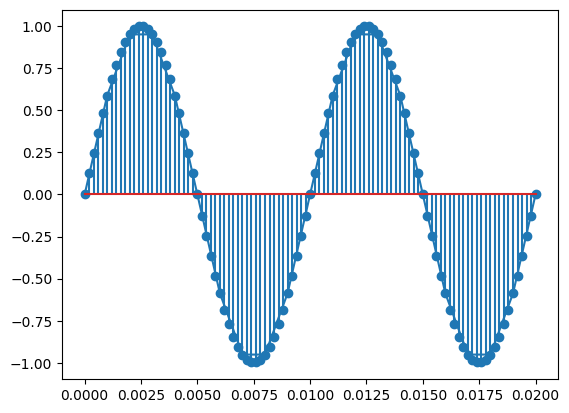

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
pi = np.pi
fm = 100
fs = 50*fm

t = np.arange(0,2/fm+0.001,0.001)
ts = np.arange(0,2/fm+1/fs,1/fs)

y = np.sin(2*pi*fm*t)
ys = np.sin(2*pi*fm*ts)
plt.plot(t,y)
plt.stem(ts,ys)

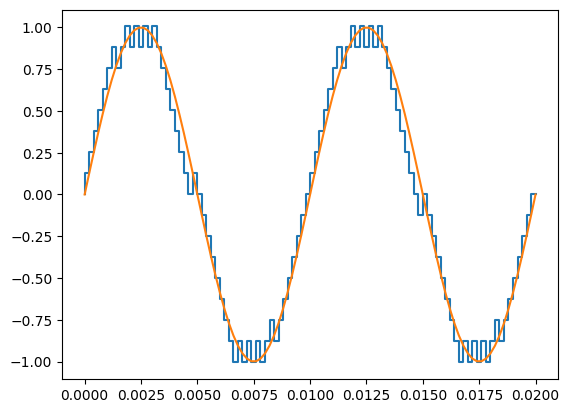

In [51]:
delta = 2*pi*fm*(1/fs)

e = np.zeros(len(ts))
eq = np.zeros(len(ts))
mq = np.zeros(len(ts))

for i in range(0,len(ts)):
    if i == 0:
        e[i] = ys[i]
        eq[i] = delta*np.sign(e[i])
        mq[i] = eq[i]
    else:
        e[i] = ys[i] - mq[i-1]
        eq[i] = delta*np.sign(e[i])
        mq[i] = eq[i] + mq[i-1]

plt.step(ts,mq)
plt.plot(ts,ys)

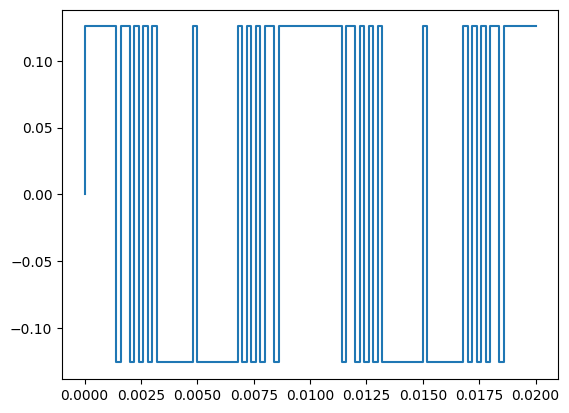

In [52]:
plt.step(ts,eq)

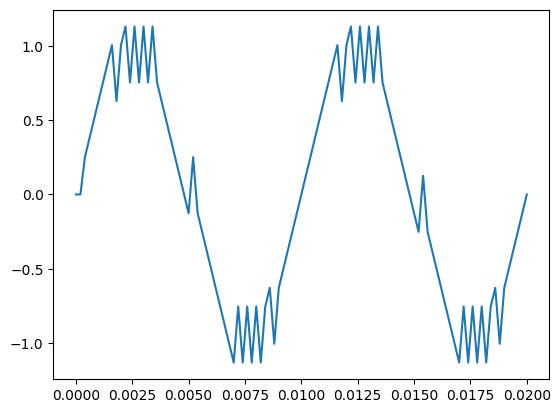

In [53]:
s_rec = np.zeros(len(ts))

for i in range(1,len(ts)):
    s_rec[i] = mq[i-1] + eq[i-1]

plt.plot(ts,s_rec)

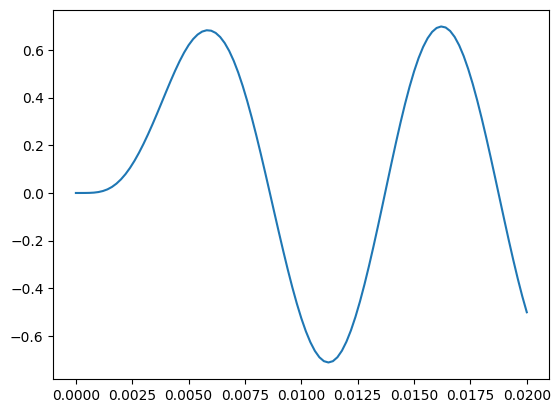

In [54]:
[b,a] = signal.butter(3,fm/(fs/2))
rec = signal.lfilter(b,a,s_rec)
plt.plot(ts,rec)